## Exercice séance 4

Tous les exercices sont sur les données du fichier `CSS_openalex.csv` diponible ici : https://filesender.renater.fr/?s=download&token=01def21d-738d-48f1-860a-820c37fab6d7


Ces données représentent toutes les publications scientifiques de la base openalex qui mentionnent `computational social science` dans leur titre ou abstract.

## Exercice 1

- Quelle est la distribution des types de publications (`type`) du dataset en pourcentages
- Renommer la modalité `Other` en `Autre` (regarder du côté de .replace)
- Renomer la variable `primary_location.source.display_name` en `source` (regarder du côté de .rename)

In [4]:
# Commencer par importer pandas
import pandas as pd

# Et lire les données
df = pd.read_csv("../../data/CSS_openalex.csv", low_memory=False)
# low_memory=False n'est pas obligatoire mais me permet d'éviter le message d'erreur

> Internally process the file in chunks, resulting in lower memory use while parsing, but possibly mixed type inference. To ensure no mixed types either set False, or specify the type with the dtype parameter. Note that the entire file is read into a single DataFrame regardless, use the chunksize or iterator parameter to return the data in chunks. (Only valid with C parser).

### 1.1 Distribution

In [5]:
# Je veux donc le nombre de publication par "type"
df["type"].value_counts()

type
article            6029
preprint           1040
book-chapter        605
book                366
review              237
editorial           228
dissertation        220
paratext            191
dataset              92
other                73
letter               56
peer-review          51
report               35
reference-entry      34
libguides             9
grant                 6
erratum               6
Name: count, dtype: int64

In [6]:
# En fait je veux les fréquences :
# donc normaliser les valeurs : normalize=True
df["type"].value_counts(normalize=True)

type
article            0.649817
preprint           0.112093
book-chapter       0.065208
book               0.039448
review             0.025544
editorial          0.024574
dissertation       0.023712
paratext           0.020586
dataset            0.009916
other              0.007868
letter             0.006036
peer-review        0.005497
report             0.003772
reference-entry    0.003665
libguides          0.000970
grant              0.000647
erratum            0.000647
Name: proportion, dtype: float64

In [ ]:
# Je les veux même en pourcentage ces fréquences : *100
df["type"].value_counts(normalize=True) * 100

type
article            64.981677
preprint           11.209312
book-chapter        6.520802
book                3.944816
review              2.554430
editorial           2.457426
dissertation        2.371201
paratext            2.058633
dataset             0.991593
other               0.786808
letter              0.603578
peer-review         0.549687
report              0.377236
reference-entry     0.366458
libguides           0.097004
grant               0.064669
erratum             0.064669
Name: proportion, dtype: float64

In [ ]:
# Et je peux arrondir :
# la dernière valeur me permet de préciser le nb de chiffre après la virgule
round(100 * df["type"].value_counts(normalize=True), 2)

type
article            64.98
preprint           11.21
book-chapter        6.52
book                3.94
review              2.55
editorial           2.46
dissertation        2.37
paratext            2.06
dataset             0.99
other               0.79
letter              0.60
peer-review         0.55
report              0.38
reference-entry     0.37
libguides           0.10
grant               0.06
erratum             0.06
Name: proportion, dtype: float64

### 1.2 Renommer la modalité `Other` en `Autre` (regarder du côté de .replace)


In [ ]:
# Recoder en utilisant replace

df["type"].replace({"other": "autre"}, inplace=True)
# je peux utiliser inplace=True pour modifier directement le dataframe

# l'alternative serait ça (que l'on retrouve pas mal) :
# df["type"] = df["type"].replace({"other" : "autre"}, inplace=True)


In [18]:
df["type"].value_counts()

type
article            6029
preprint           1040
book-chapter        605
book                366
review              237
editorial           228
dissertation        220
paratext            191
dataset              92
autre                73
letter               56
peer-review          51
report               35
reference-entry      34
libguides             9
grant                 6
erratum               6
Name: count, dtype: int64

In [ ]:
# Si on n'a qu'une modification, on peut se contenter de passer nos valeurs dans la parenthèse
df["type"] = df["type"].replace("preprint", "pré-publication")
df["type"].value_counts()

type
article            6029
pré-publication    1040
book-chapter        605
book                366
review              237
editorial           228
dissertation        220
paratext            191
dataset              92
autre                73
letter               56
peer-review          51
report               35
reference-entry      34
libguides             9
grant                 6
erratum               6
Name: count, dtype: int64

In [ ]:
# mais le dictionnaire est pratique dès que l'on veut modifier plusieurs éléments :
df["type"].replace(
    {
        "article": "article",
        "preprint": "pré-publication",
        "book-chapter": "chapitre de livre",
        "book": "livre",
        "review": "revue de littérature",
    },
    inplace=True,
)

### 1.3 - Renomer la variable `primary_location.source.display_name` en `source` (regarder du côté de .rename)

In [28]:
df.rename(columns={"primary_location.source.display_name": "source"}, inplace=True)

In [29]:
df["source"]

0                                                 Science
1            The European Physical Journal Special Topics
2                                                 Science
3                              Annual Review of Sociology
4       Wiley Interdisciplinary Reviews Computational ...
                              ...                        
9273                                                  NaN
9274    Progress in Photovoltaics Research and Applica...
9275                                                  NaN
9276                                                  NaN
9277                    Emerald Publishing Limited eBooks
Name: source, Length: 9278, dtype: object

## Exercice 2

- Ajouter une colonne qui correspond au nombre de mots des titres (`title`) de chaque référence.
- Calculer le nombre de mots moyens et la variance par `source`.
- Quelle est la `source` qui a le plus de mots, le moins de mots ?


### 2.1 Ajouter une colonne qui correspond au nombre de mots des titres (`title`) de chaque référence.


In [116]:
# Facile à faire directement en pandas :
df["title_nb_mots"] = df["title"].str.split().str.len()
df["title_nb_mots"]

0        3.0
1        5.0
2        6.0
3        5.0
4        3.0
        ... 
9273     7.0
9274     5.0
9275    17.0
9276    17.0
9277     1.0
Name: title_nb_mots, Length: 9278, dtype: float64

In [ ]:
# Attention, s'il n'y a rien il ne met pas 0 mais renvoie un NaN
df["title_nb_mots"].isna().sum()

# j'aurai pu lui demander explicitement de renvoyer 0 en ajoutant .fillna(0)

11

In [ ]:
# On savait déjà le faire en faisant une fonction
def compter_mots(texte):
    texte = str(texte)
    mots = texte.split()
    nb_mots = len(mots)
    return nb_mots

In [ ]:
# Que l'on peut appliquer avec apply :
df["title"].apply(compter_mots)

0        3
1        5
2        6
3        5
4        3
        ..
9273     7
9274     5
9275    17
9276    17
9277     1
Name: title, Length: 9278, dtype: int64

In [ ]:
# pareil que ça avec de la compréhension de liste :
df["title"].apply(lambda x: len(str(x).split()))

0        3
1        5
2        6
3        5
4        3
        ..
9273     7
9274     5
9275    17
9276    17
9277     1
Name: title, Length: 9278, dtype: int64

### 2.2 Calculer le nombre de mots moyens et la variance par `source`.

In [56]:
# je veux donc grouper par source
# puis calculer la moyenne et la variance du nombre de mots
df.groupby("source")["title_nb_mots"].mean()

source
027 7 Zeitschrift für Bibliothekskultur                                                                6.000000
2003 IEEE Power Engineering Society General Meeting (IEEE Cat. No.03CH37491)                           9.000000
2013 Winter Simulations Conference (WSC)                                                              12.000000
2015 IEEE Global Communications Conference (GLOBECOM)                                                 12.000000
2016 IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (ASONAM)     9.666667
                                                                                                        ...    
대한산업공학회 추계학술대회 논문집                                                                                     7.000000
사회과학논총                                                                                                 4.000000
언론과 사회                                                                                           

In [57]:
df.groupby("source")["title_nb_mots"].var()

source
027 7 Zeitschrift für Bibliothekskultur                                                                     NaN
2003 IEEE Power Engineering Society General Meeting (IEEE Cat. No.03CH37491)                                NaN
2013 Winter Simulations Conference (WSC)                                                                    NaN
2015 IEEE Global Communications Conference (GLOBECOM)                                                       NaN
2016 IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (ASONAM)    11.066667
                                                                                                        ...    
대한산업공학회 추계학술대회 논문집                                                                                          NaN
사회과학논총                                                                                                      NaN
언론과 사회                                                                                           

In [58]:
# Pour mettre tout en même temps avec .agg()
df.groupby("source")["title_nb_mots"].agg(["mean", "median", "var", "std"])

,mean,median,var,std
source,,,,
027 7 Zeitschrift für Bibliothekskultur,6.000000,6.0,NaN,NaN
2003 IEEE Power Engineering Society General Meeting (IEEE Cat. No.03CH37491),9.000000,9.0,NaN,NaN
2013 Winter Simulations Conference (WSC),12.000000,12.0,NaN,NaN
2015 IEEE Global Communications Conference (GLOBECOM),12.000000,12.0,NaN,NaN
2016 IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (ASONAM),9.666667,11.0,11.066667,3.326660
...,...,...,...,...
대한산업공학회 추계학술대회 논문집,7.000000,7.0,NaN,NaN
사회과학논총,4.000000,4.0,NaN,NaN
언론과 사회,20.000000,20.0,NaN,NaN


### 2.3 Quelle est la `source` qui a le plus de mots, le moins de mots ?

In [59]:
df[df["title_nb_mots"] == df["title_nb_mots"].max()]

,id,doi,title,display_name,relevance_score,publication_year,publication_date,language,type,type_crossref,...,locations.source,sustainable_development_goals.id,sustainable_development_goals.score,sustainable_development_goals.display_name,grants.funder,grants.funder_display_name,grants.award_id,counts_by_year.year,counts_by_year.cited_by_count,title_nb_mots
8436,https://openalex.org/W4240168113,https://doi.org/10.1021/ja076933d,Applied Modeling and Computations in Nuclear S...,Applied Modeling and Computations in Nuclear S...,0.438282,2007,2007-04-21,en,article,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0


In [ ]:
df[df["title_nb_mots"] == df["title_nb_mots"].min()]

,id,doi,title,display_name,relevance_score,publication_year,publication_date,language,type,type_crossref,...,locations.source,sustainable_development_goals.id,sustainable_development_goals.score,sustainable_development_goals.display_name,grants.funder,grants.funder_display_name,grants.award_id,counts_by_year.year,counts_by_year.cited_by_count,title_nb_mots
529,https://openalex.org/W1521943649,https://doi.org/10.7551/mitpress/9780262014601...,Enaction,Enaction,27.741528,2010,2010-11-24,en,livre,edited-book,...,NaN,https://metadata.un.org/sdg/4,0.71,Quality education,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019|2018|2017|2...,7|10|19|18|25|50|40|40|65|37|45|49|55|30,1.0
749,https://openalex.org/W2331936027,https://doi.org/10.1097/ede.0b013e318225c2be,DAGitty,DAGitty,20.227100,2011,2011-08-02,en,letter,journal-article,...,nan|nan|nan,https://metadata.un.org/sdg/3,0.76,Good health and well-being,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019|2018|2017|2...,35|97|115|99|98|105|112|102|99|91|61|48|22|5,1.0
879,https://openalex.org/W4255682086,https://doi.org/10.7551/mitpress/9780262029537...,Control,Control,16.078379,2015,2015-09-04,en,livre,edited-book,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019|2018|2017|2016,5|19|19|17|39|18|4|20|11|6,1.0
921,https://openalex.org/W2963323905,https://doi.org/10.1145/3178876.3186021,MemeSequencer,MemeSequencer,15.255738,2018,2018-01-01,en,article,proceedings-article,...,nan|nan,https://metadata.un.org/sdg/10,0.65,Reduced inequalities,NaN,NaN,NaN,2024|2023|2022|2021|2020|2018,1|5|3|7|1|1,1.0
1130,https://openalex.org/W2103211051,https://doi.org/10.1145/2441955.2441962,Truthy,Truthy,11.725438,2013,2013-02-22,en,article,proceedings-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023|2022|2021|2020|2019|2018|2017|2016|2015|2...,1|1|2|19|2|4|3|3|6|9|3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,https://openalex.org/W4233867325,https://doi.org/10.1108/s0731-905320200000041017,Index,Index,0.115275,2020,2020-03-27,en,paratext,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9231,https://openalex.org/W4246127673,https://doi.org/10.1108/s1569-375920180000099015,Index,Index,0.112926,2018,2018-06-12,en,paratext,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9241,https://openalex.org/W4376627115,https://doi.org/10.1108/s1569-37592023000110a017,Index,Index,0.100181,2023,2023-05-15,en,paratext,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9250,https://openalex.org/W4387148366,https://doi.org/10.1108/978-1-83753-022-920231015,Index,Index,0.088175,2023,2023-09-28,en,paratext,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [61]:
df.loc[df["title_nb_mots"].idxmax()]

id                                                https://openalex.org/W4240168113
doi                                              https://doi.org/10.1021/ja076933d
title                            Applied Modeling and Computations in Nuclear S...
display_name                     Applied Modeling and Computations in Nuclear S...
relevance_score                                                           0.438282
                                                       ...                        
grants.funder_display_name                                                     NaN
grants.award_id                                                                NaN
counts_by_year.year                                                            NaN
counts_by_year.cited_by_count                                                  NaN
title_nb_mots                                                                 70.0
Name: 8436, Length: 184, dtype: object

In [69]:
df.loc[df["title_nb_mots"].idxmax(), "source"]

'Journal of the American Chemical Society'

`If multiple values equal the maximum, the first row label with that value is returned.`

In [71]:
df.loc[df["title_nb_mots"].idxmin()]

id                                                https://openalex.org/W1521943649
doi                              https://doi.org/10.7551/mitpress/9780262014601...
title                                                                     Enaction
display_name                                                              Enaction
relevance_score                                                          27.741528
                                                       ...                        
grants.funder_display_name                                                     NaN
grants.award_id                                                                NaN
counts_by_year.year              2025|2024|2023|2022|2021|2020|2019|2018|2017|2...
counts_by_year.cited_by_count             7|10|19|18|25|50|40|40|65|37|45|49|55|30
title_nb_mots                                                                  1.0
Name: 529, Length: 184, dtype: object

In [68]:
df["title_nb_mots"].idxmin()

529

## Exercice 4

- Découper le montant des frais de publication en USD (`apc_list.value_usd`) en quartiles avec la méthode `qcut`
- Quelle est la référence qui a payé le montant le plus élevé ?

### 4.1 - Découper le montant des frais de publication en USD (`apc_list.value_usd`) en quartiles avec la méthode `qcut`

In [72]:
df["apc_quartile"] = pd.qcut(
    df["apc_list.value_usd"], [0, 0.25, 0.5, 0.75, 1], ["Q1", "Q2", "Q3", "Q4"]
)

In [ ]:
df["apc_quartile"].value_counts(normalize=True) * 100

apc_quartile
Q1    25.013805
Q2    25.013805
Q4    25.013805
Q3    24.958586
Name: proportion, dtype: float64

In [77]:
df["apc_quartile"].value_counts(normalize=True, dropna=False) * 100

apc_quartile
NaN    80.480707
Q1      4.882518
Q2      4.882518
Q4      4.882518
Q3      4.871740
Name: proportion, dtype: float64

### 4.2 Quelle est la référence qui a payé le montant le plus élevé ?

In [86]:
df.loc[[df["apc_list.value_usd"].idxmax()], ["title", "source", "apc_list.value_usd"]]

,title,source,apc_list.value_usd
6,Integrating explanation and prediction in comp...,Nature,11690.0


`If multiple values equal the maximum, the first row label with that value is returned.`

In [ ]:
# je peux donc selectionner dans mon dataframe
# l'ensemble de références qui remplisse la condition
df[df["apc_list.value_usd"] == df["apc_list.value_usd"].max()]

,id,doi,title,display_name,relevance_score,publication_year,publication_date,language,type,type_crossref,...,sustainable_development_goals.id,sustainable_development_goals.score,sustainable_development_goals.display_name,grants.funder,grants.funder_display_name,grants.award_id,counts_by_year.year,counts_by_year.cited_by_count,title_nb_mots,apc_quartile
6,https://openalex.org/W3174174150,https://doi.org/10.1038/s41586-021-03659-0,Integrating explanation and prediction in comp...,Integrating explanation and prediction in comp...,1008.974060,2021,2021-06-30,en,article,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,2025|2024|2023|2022|2021|2020|2019,20|67|89|70|27|1|1,8.0,Q4
11,https://openalex.org/W2079631204,https://doi.org/10.1038/488448a,Computational social science: Making the links,Computational social science: Making the links,752.027340,2012,2012-08-01,en,article,journal-article,...,https://metadata.un.org/sdg/10,0.43,Reduced inequalities,NaN,NaN,NaN,2024|2023|2022|2021|2020|2019|2018|2017|2016|2...,2|3|7|7|7|4|14|9|17|21|14|15|2,6.0,Q4
25,https://openalex.org/W3176348367,https://doi.org/10.1038/s41586-021-03649-2,Human social sensing is an untapped resource f...,Human social sensing is an untapped resource f...,522.467100,2021,2021-06-30,en,article,journal-article,...,https://metadata.un.org/sdg/10,0.58,Reduced inequalities,NaN,NaN,NaN,2025|2024|2023|2022|2021|2019,5|22|25|16|7|1,11.0,Q4
109,https://openalex.org/W4318245347,https://doi.org/10.1038/s41562-023-01527-7,Facilitating system-level behavioural climate ...,Facilitating system-level behavioural climate ...,228.930330,2023,2023-01-27,en,letter,journal-article,...,https://metadata.un.org/sdg/13,0.8,Climate action,https://openalex.org/F4320306137|https://opena...,Bill and Melinda Gates Foundation|Resnick Sust...,OPP1144|None,2025|2024|2023,2|9|3,9.0,Q4
4228,https://openalex.org/W4393202545,https://doi.org/10.1038/s43588-024-00604-9,Recent achievements and conceptual challenges ...,Recent achievements and conceptual challenges ...,2.898379,2024,2024-03-26,en,article,journal-article,...,https://metadata.un.org/sdg/11,0.82,Sustainable cities and communities,NaN,NaN,NaN,2025,1,9.0,Q4
7584,https://openalex.org/W4399121490,https://doi.org/10.1038/s43588-024-00641-4,Accelerating scientific progress with preprints,Accelerating scientific progress with preprints,0.565708,2024,2024-05-29,en,editorial,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Q4


In [93]:
# et avec un peu de barbarie et de crochets renvoyer ce qui m'intéresse:
df[df["apc_list.value_usd"] == df["apc_list.value_usd"].max()][
    ["title", "source", "apc_list.value_usd"]
]

,title,source,apc_list.value_usd
6,Integrating explanation and prediction in comp...,Nature,11690.0
11,Computational social science: Making the links,Nature,11690.0
25,Human social sensing is an untapped resource f...,Nature,11690.0
109,Facilitating system-level behavioural climate ...,Nature Human Behaviour,11690.0
4228,Recent achievements and conceptual challenges ...,Nature Computational Science,11690.0
7584,Accelerating scientific progress with preprints,Nature Computational Science,11690.0


## Exercice 5

- Compter le nombre de publications par auteurs (`authorships.author.display_name`)
- Conseil :
    - spliter les auteurs sur "|"
    - regarder ensuite du côté de `.explode()`et de `.value_counts()`
- Faire un barplot des 5 principaux publiants


### 5.1 Compter le nombre de publications par auteurs (`authorships.author.display_name`)

Plus prise de tête ici, demande à aller plus loin et manipuler un peu tout ça.

In [ ]:
# En fait nos auteurs sont plusieurs par cellule :
df["authorships.author.display_name"]

0       David Lazer|Alex Pentland|Lada A. Adamic|Sinan...
1       Rosaria Conte|Nigel Gilbert|Giulia Bonelli|Cla...
2       David Lazer|Alex Pentland|Duncan J. Watts|Sina...
3       S. Kellogg|Tom Wolff|Danielle Montagne|Christo...
4                                  Claudio Cioffi‐Revilla
                              ...                        
9273    Saige Rutherford|Pieter Barkema|Ivy F. Tso|Cha...
9274                                          Ziv Hameiri
9275                      Ben S. Cooper|Nick Ruktanonchai
9276    Kimberly Fornace|Neâl Alexander|Tommy Rowel Ab...
9277                                                  NaN
Name: authorships.author.display_name, Length: 9278, dtype: object

In [97]:
# Avant de les compter je dois donc les séparer
# Je peux utiliser str.split(), équivalent pandas de split()
df["auteurs"] = df["authorships.author.display_name"].str.split("|")
df["auteurs"]

0       [David Lazer, Alex Pentland, Lada A. Adamic, S...
1       [Rosaria Conte, Nigel Gilbert, Giulia Bonelli,...
2       [David Lazer, Alex Pentland, Duncan J. Watts, ...
3       [S. Kellogg, Tom Wolff, Danielle Montagne, Chr...
4                                [Claudio Cioffi‐Revilla]
                              ...                        
9273    [Saige Rutherford, Pieter Barkema, Ivy F. Tso,...
9274                                        [Ziv Hameiri]
9275                   [Ben S. Cooper, Nick Ruktanonchai]
9276    [Kimberly Fornace, Neâl Alexander, Tommy Rowel...
9277                                                  NaN
Name: auteurs, Length: 9278, dtype: object

In [100]:
# puis exploser ça pour avoir un auteur par ligne
# On a donc un colonne bien plus longue
all_authors = df["auteurs"].explode()
all_authors

0                  David Lazer
0                Alex Pentland
0               Lada A. Adamic
0                   Sinan Aral
0       Albert‐László Barabási
                 ...          
9276              Meng Li Wong
9276                  Sui H Ng
9276                   Jon Cox
9276            Chris Drakeley
9277                       NaN
Name: auteurs, Length: 26562, dtype: object

In [101]:
# Et enfin on peut faire un value_counts() dessus:
all_authors.value_counts()


auteurs
Claudio Cioffi‐Revilla      25
Alan K. Mackworth           19
David Poole                 19
Kathleen M. Carley          19
Joshua M. Epstein           16
                            ..
Charith Wickramaarachchi     1
Viktor K. Prasanna           1
Ruth King                    1
Beate Völker                 1
Chris Drakeley               1
Name: count, Length: 20028, dtype: int64

### 5.2 Faire un barplot des 5 principaux publiants


<Axes: xlabel='auteurs'>

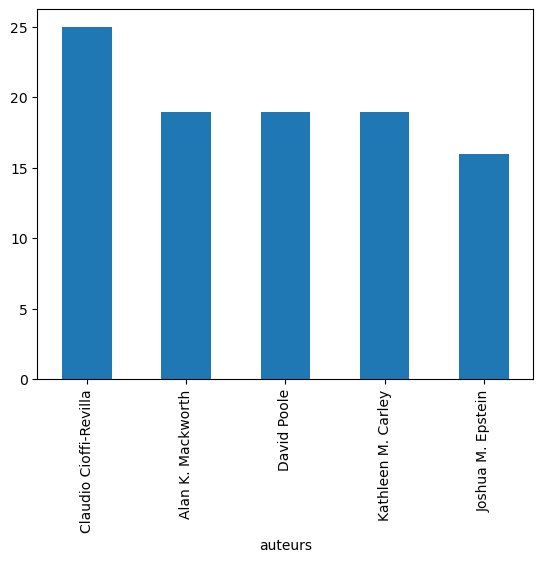

In [103]:
all_authors.value_counts()[0:5].plot(kind="bar")
